## JWST F1000W 30Dor ERO

Data is setup in a subdirectory that is given in the filter variable below (i.e., "F560W"). Inside this directory, there should be 4 subdirectories called stage0, stage1, stage2, and stage3. The uncal (raw) fits files should be in the stage0 directory.

Author: Karl Gordon

Last modified: 20 Jul 2022

Based on JWebbinar notebooks by Bryan Hilbert, MIRI simulated notebooks by Mattia Libralato, input from various MIRI team members, and input from the jwst pipeline developers.

Uses custom code given in helpers subdirectory.

Extensively tested on MIRI ERO mosaics.

### Variables controling processing and display

In [1]:
filter = "F1000W"
fwhm = 2.9
basename = "jw0272900200"

crval = [84.69695784078512, -69.09492271266589]
# rotation = 0.0
# crval = None
rotation = None

# shifts determine from previous runs with treakreg or with other filters
#   analysis using Analyze_teakreg_shifts.ipynb
#   run this notebook after running shortest wavelength dataset with tweakreg=True and align_to_gaia=True
#     and setting all the tile?_shifts to [0.0, 0.0]
#   use the resulting shifts here and set tweakreg=False and align_to_gaia=False
#tile1_shifts = [0.0, 0.0]
#tile2_sfhits = [0.0, 0.0]
#tweakreg = True
#align_to_gaia = True
tile1_shifts = [0.2342195515193774, -0.9316779689106902]
tile2_shifts = [0.7884962280416655, -0.09212854823862968]
tweakreg = False
align_to_gaia = False

# only needed if multiple datasets combined that are taken separately (e.g., weeks apart)
matchbkg = False

# display range for uncalibrated images
drange_raw = [100., 3000.]
# display range for calibrated images
drange_cal = [200., 3000.]
dmap = "afmhot"  # same as ds9 bb

# specify the linearity file to use if default not desired
# linfile = ""
linfile = None

# specify the flat file to use if default not desired
flatfile = None

run_detector1 = True
run_image2 = True
run_image3 = True

In [2]:
import os
import glob
import copy

from astropy.io import ascii
from astropy.visualization import simple_norm

In [3]:
import astropy
print(astropy.__version__)

5.0.4


In [4]:
os.environ["CRDS_PATH"] = "/home/kgordon/crds_cache"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds.stsci.edu"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import ImageGrid

# Use this version for non-interactive plots (easier scrolling of the notebook)
%matplotlib inline

# Use this version (outside of Jupyter Lab) if you want interactive plots
#%matplotlib notebook

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80

In [6]:
# List of possible data quality flags
from jwst.datamodels import dqflags
from jwst import datamodels

from jwst.associations import asn_from_list
from jwst.associations.lib.rules_level2_base import DMSLevel2bBase
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base

# custom helper routines
from helpers.jwst_helpers import show_image, overlay_catalog
from helpers.miri_helpers import miri_detector1, miri_image2, miri_image3
from helpers.miri_clean import fix_rateints_to_rate, shift_cal_wcs

In [7]:
import jwst
print(jwst.__version__)

1.6.2.dev4+g35d5e1d


In [8]:
import stcal
print(stcal.__version__)

1.0.1.dev2+g6262cda


In [9]:
# create stage directories if they do not exist
for k in range(4):
    cpath = f"./{filter}/stage{k}"
    if not os.path.exists(cpath):
        os.makedirs(cpath)

## CALWEBB_DETECTOR1

In [10]:
miri_uncal_files = glob.glob(f"./{filter}/stage0/*uncal.fits")
output_dir = f'./{filter}/stage1'
print(miri_uncal_files)

['./F1000W/stage0/jw02729002002_02103_00004_mirimage_uncal.fits', './F1000W/stage0/jw02729002001_02103_00005_mirimage_uncal.fits', './F1000W/stage0/jw02729002001_02103_00010_mirimage_uncal.fits', './F1000W/stage0/jw02729002002_02103_00006_mirimage_uncal.fits', './F1000W/stage0/jw02729002001_02103_00007_mirimage_uncal.fits', './F1000W/stage0/jw02729002002_02103_00005_mirimage_uncal.fits', './F1000W/stage0/jw02729002001_02103_00002_mirimage_uncal.fits', './F1000W/stage0/jw02729002002_02103_00008_mirimage_uncal.fits', './F1000W/stage0/jw02729002001_02103_00008_mirimage_uncal.fits', './F1000W/stage0/jw02729002001_02103_00006_mirimage_uncal.fits', './F1000W/stage0/jw02729002002_02103_00003_mirimage_uncal.fits', './F1000W/stage0/jw02729002001_02103_00001_mirimage_uncal.fits', './F1000W/stage0/jw02729002002_02103_00009_mirimage_uncal.fits', './F1000W/stage0/jw02729002002_02103_00002_mirimage_uncal.fits', './F1000W/stage0/jw02729002001_02103_00003_mirimage_uncal.fits', './F1000W/stage0/jw02729

In [11]:
if run_detector1:
    miri_detector1(miri_uncal_files, output_dir, linfile=linfile)

2022-07-25 09:58:32,625 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-07-25 09:58:32,625 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 09:58:32,626 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-07-25 09:58:32,627 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None, 'class': ''}


2022-07-25 09:58:32,627 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 09:58:32,628 - stpipe 

./F1000W/stage0/jw02729002002_02103_00004_mirimage_uncal.fits


2022-07-25 09:58:32,723 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline running with args ('./F1000W/stage0/jw02729002002_02103_00004_mirimage_uncal.fits',).
2022-07-25 09:58:32,732 - stpipe.Detector1Pipeline - INFO - Step Detector1Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': './F1000W/stage1', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_calibrated_ramp': False, 'steps': {'group_scale': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'dq_init': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': T

2022-07-25 09:58:37,640 - stpipe.Detector1Pipeline.group_scale - INFO - NFRAMES and FRMDIVSR are equal; correction not needed
2022-07-25 09:58:37,640 - stpipe.Detector1Pipeline.group_scale - INFO - Step will be skipped
2022-07-25 09:58:37,642 - stpipe.Detector1Pipeline.group_scale - INFO - Step group_scale done
2022-07-25 09:58:37,745 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02103_00004_mirimage_uncal.fits>,).
2022-07-25 09:58:37,747 - stpipe.Detector1Pipeline.dq_init - INFO - Step dq_init parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-07-25 09:58:37,765 - stpipe.Detector1Pipeline.dq_init - INFO - Using MASK reference file /home/kgordon/crds_cache/references/jwst/miri

2022-07-25 09:58:46,497 - stpipe.Detector1Pipeline.refpix - INFO - MIRI full frame data
2022-07-25 09:58:46,498 - stpipe.Detector1Pipeline.refpix - INFO - The following parameter is valid for this mode:
2022-07-25 09:58:46,498 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_rows = True
2022-07-25 09:58:46,498 - stpipe.Detector1Pipeline.refpix - INFO - The following parameters are not applicable and are ignored:
2022-07-25 09:58:46,499 - stpipe.Detector1Pipeline.refpix - INFO - use_side_ref_pixels = False
2022-07-25 09:58:46,499 - stpipe.Detector1Pipeline.refpix - INFO - odd_even_columns = False
2022-07-25 09:58:46,499 - stpipe.Detector1Pipeline.refpix - INFO - side_smoothing_length = False
2022-07-25 09:58:46,499 - stpipe.Detector1Pipeline.refpix - INFO - side_gain = False
2022-07-25 09:58:46,500 - stpipe.Detector1Pipeline.refpix - INFO - Subtracting initial read from each integration
2022-07-25 09:58:46,826 - stpipe.Detector1Pipeline.refpix - INFO - Adding initial read back in
202

2022-07-25 09:58:47,816 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 09:58:47,818 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 09:58:47,824 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 506 pixels with at least one CR from five groups.
2022-07-25 09:58:47,825 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 09:58:47,826 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 09:58:47,842 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 09:58:47,845 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 09:58:47,870 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_

2022-07-25 09:58:48,082 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three groups.
2022-07-25 09:58:48,089 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 09:58:48,092 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1646 pixels with at least one CR from five groups.
2022-07-25 09:58:48,093 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 35 pixels with at least one CR from four groups.
2022-07-25 09:58:48,094 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from three groups.
2022-07-25 09:58:48,111 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 09:58:48,145 - stpipe.Detector1Pipeline.jump - INFO - Working on int

2022-07-25 09:58:48,623 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 09:58:48,654 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 09:58:48,701 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1059 pixels with at least one CR from five groups.
2022-07-25 09:58:48,702 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from four groups.
2022-07-25 09:58:48,703 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-25 09:58:48,854 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 09:58:48,901 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1058 pixels with at least one CR from five groups.
2022-07-25 09:58:48,902 - stpipe.Detector1Pipeline.jump

2022-07-25 09:58:53,853 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-07-25 09:58:53,853 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None, 'class': ''}


2022-07-25 09:58:53,854 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-07-25 09:58:53,854 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_ipc': None, 'class': ''}


2022-07-25 09:58:53,855 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance 

./F1000W/stage0/jw02729002001_02103_00005_mirimage_uncal.fits


2022-07-25 09:58:55,489 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02103_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 09:58:55,492 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 09:58:55,493 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 09:58:55,494 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 09:58:55,495 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 09:58:59,091 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-07-25 09:58:59,110 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 09:58:59,583 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 09:58:59,680 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02103_00005_mirimage_uncal.fits>,).
2022-07-25 09:58:59,681 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-25 09:59:04,615 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 09:59:04,649 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 09:59:04,652 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 801 pixels with at least one CR from five groups.
2022-07-25 09:59:04,653 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 12 pixels with at least one CR from four groups.
2022-07-25 09:59:04,654 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-25 09:59:04,654 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 09:59:04,666 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: Run

2022-07-25 09:59:04,947 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-25 09:59:04,948 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 09:59:04,954 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1036 pixels with at least one CR from five groups.
2022-07-25 09:59:04,955 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from four groups.
2022-07-25 09:59:04,955 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from three groups.
2022-07-25 09:59:04,968 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 09:59:05,014 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 496 pixels with at least one CR from five gro

2022-07-25 09:59:05,317 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 09:59:05,317 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 09:59:05,324 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 09:59:05,326 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1192 pixels with at least one CR from five groups.
2022-07-25 09:59:05,327 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-25 09:59:05,328 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 09:59:05,330 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1084 pixels with at least one CR from five gro

2022-07-25 09:59:08,352 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 09:59:08,405 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 09:59:08,407 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 09:59:08,450 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 09:59:08,452 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 09:59:08,749 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 09:59:08,750 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 09:59:08,900 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 09:59:09,006 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002001_02103_00005_mirimage_uncal.fits>,).
2022-07-25 09:59:09,010 - stpipe

2022-07-25 09:59:10,810 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-25 09:59:10,810 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 09:59:10,811 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 09:59:10,811 - stpipe.Detector1Pipeline

./F1000W/stage0/jw02729002001_02103_00010_mirimage_uncal.fits


2022-07-25 09:59:12,603 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02103_00010_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 09:59:12,607 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 09:59:12,608 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 09:59:12,609 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 09:59:12,609 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 09:59:16,151 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-07-25 09:59:16,169 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 09:59:16,637 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 09:59:16,733 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02103_00010_mirimage_uncal.fits>,).
2022-07-25 09:59:16,734 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-25 09:59:21,639 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 09:59:21,650 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 09:59:21,653 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1393 pixels with at least one CR from five groups.
2022-07-25 09:59:21,654 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 16 pixels with at least one CR from four groups.
2022-07-25 09:59:21,655 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from three groups.
2022-07-25 09:59:21,677 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 09:59:21,690 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: R

2022-07-25 09:59:21,951 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 15 pixels with at least one CR from three groups.
2022-07-25 09:59:21,955 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 09:59:21,958 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 515 pixels with at least one CR from five groups.
2022-07-25 09:59:21,959 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 15 pixels with at least one CR from four groups.
2022-07-25 09:59:21,959 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1689 pixels with at least one CR from five groups.
2022-07-25 09:59:21,960 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 09:59

2022-07-25 09:59:22,231 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 09:59:22,235 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 09:59:22,271 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 627 pixels with at least one CR from five groups.
2022-07-25 09:59:22,272 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 09:59:22,273 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 09:59:22,276 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 624 pixels with at least one CR from five groups.
2022-07-25 09:59:22,277 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from four groups.
2022-07-25 09:59:22,278 - stpipe.Detector1Pipeline.jump -

2022-07-25 09:59:25,583 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 09:59:25,590 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 09:59:25,592 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 09:59:25,810 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 09:59:25,812 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 09:59:25,925 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 09:59:25,927 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 09:59:25,942 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 09:59:25,944 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 09:59:26,085 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 09:59:

2022-07-25 09:59:27,915 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-25 09:59:27,916 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-25 09:59:27,916 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 09:59:27,917 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1000W/stage0/jw02729002002_02103_00006_mirimage_uncal.fits


2022-07-25 09:59:29,611 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02103_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 09:59:29,614 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 09:59:29,616 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 09:59:29,617 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 09:59:29,617 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 09:59:33,101 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-07-25 09:59:33,119 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 09:59:33,579 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 09:59:33,681 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02103_00006_mirimage_uncal.fits>,).
2022-07-25 09:59:33,682 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-25 09:59:38,711 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 09:59:38,712 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 09:59:38,715 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 749 pixels with at least one CR from five groups.
2022-07-25 09:59:38,716 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from four groups.
2022-07-25 09:59:38,716 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 19 pixels with at least one CR from three groups.
2022-07-25 09:59:38,729 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 09:59:38,762 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 09:59:38,766 - stpipe.Detector1Pipelin

2022-07-25 09:59:39,018 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 09:59:39,025 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 510 pixels with at least one CR from five groups.
2022-07-25 09:59:39,025 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 09:59:39,026 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 22 pixels with at least one CR from four groups.
2022-07-25 09:59:39,027 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 09:59:39,029 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 09:59:39,035 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 468 pixels with at least one CR from five groups.
2022-07-25 09:59:39,036 - stpipe.Detector1Pipeline.jump 

2022-07-25 09:59:39,302 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 09:59:39,323 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 09:59:39,324 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 09:59:39,365 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 09:59:39,371 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 390 pixels with at least one CR from five groups.
2022-07-25 09:59:39,372 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from four groups.
2022-07-25 09:59:39,373 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 09:59:39,374 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 544 pixels with 

2022-07-25 09:59:42,637 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 09:59:42,684 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 09:59:42,686 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 09:59:42,896 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 09:59:42,898 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 09:59:42,911 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 09:59:42,912 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 09:59:43,059 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 09:59:43,167 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002002_02103_00006_mirimage_uncal.fits>,).
2022-07-25 09:59:43,170 - stpipe

2022-07-25 09:59:44,907 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-25 09:59:44,908 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 09:59:44,908 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 09:59:44,909 - stpipe.Detector1Pipeline

./F1000W/stage0/jw02729002001_02103_00007_mirimage_uncal.fits


2022-07-25 09:59:46,421 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02103_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 09:59:46,424 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 09:59:46,426 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 09:59:46,426 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 09:59:46,427 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 09:59:49,994 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-07-25 09:59:50,013 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 09:59:50,471 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 09:59:50,575 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02103_00007_mirimage_uncal.fits>,).
2022-07-25 09:59:50,576 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-25 09:59:55,569 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 09:59:55,579 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 09:59:55,582 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1340 pixels with at least one CR from five groups.
2022-07-25 09:59:55,583 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 23 pixels with at least one CR from four groups.
2022-07-25 09:59:55,584 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 09:59:55,614 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 09:59:55,623 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: Ru

2022-07-25 09:59:55,882 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 09:59:55,903 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 505 pixels with at least one CR from five groups.
2022-07-25 09:59:55,904 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 09:59:55,905 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 09:59:55,912 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 660 pixels with at least one CR from five groups.
2022-07-25 09:59:55,913 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 09:59:55,914 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three group

2022-07-25 09:59:56,220 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-25 09:59:56,220 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from three groups.
2022-07-25 09:59:56,251 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 09:59:56,264 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 09:59:56,297 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 751 pixels with at least one CR from five groups.
2022-07-25 09:59:56,298 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 57 pixels with at least one CR from four groups.
2022-07-25 09:59:56,299 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 09:59:56,311 - stpipe.Detector1Pipeline.jump - 

2022-07-25 09:59:59,705 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 09:59:59,797 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 09:59:59,799 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 09:59:59,815 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 09:59:59,818 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 09:59:59,824 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 09:59:59,826 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:00:00,089 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:00:00,091 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:00:00,235 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 10:00:

2022-07-25 10:00:02,238 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-25 10:00:02,238 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-25 10:00:02,239 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 10:00:02,240 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1000W/stage0/jw02729002002_02103_00005_mirimage_uncal.fits


2022-07-25 10:00:03,872 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02103_00005_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 10:00:03,875 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 10:00:03,876 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 10:00:03,877 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 10:00:03,878 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 10:00:07,544 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-07-25 10:00:07,565 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 10:00:08,016 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 10:00:08,124 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02103_00005_mirimage_uncal.fits>,).
2022-07-25 10:00:08,125 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-25 10:00:13,214 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from four groups.
2022-07-25 10:00:13,215 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 10:00:13,227 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:00:13,259 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 10:00:13,257 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 409 pixels with at least one CR from five groups.
2022-07-25 10:00:13,258 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 10:00:13,278 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarn

2022-07-25 10:00:13,523 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1578 pixels with at least one CR from five groups.
2022-07-25 10:00:13,524 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from four groups.
2022-07-25 10:00:13,524 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from three groups.
2022-07-25 10:00:13,525 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 10:00:13,551 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 463 pixels with at least one CR from five groups.
2022-07-25 10:00:13,552 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 10:00:13,553 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gr

2022-07-25 10:00:13,826 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 10:00:13,858 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:00:13,861 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 10:00:13,863 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 10:00:13,865 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 10:00:13,901 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 10:00:13,912 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1211 pixels with at least one CR from five groups.
2022-07-25 10:00:13,912 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 976 pixels with at least one CR from five groups.
2022-07-25 10:00:13,913 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-07-25 10:00:17,281 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:00:17,283 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:00:17,426 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 10:00:17,539 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002002_02103_00005_mirimage_uncal.fits>,).
2022-07-25 10:00:17,542 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-07-25 10:00:17,576 - stpipe.Detector1Pipeline.gain_scale - INFO - GAINFACT not found in gain reference file
2022-07-25 10:00:17,577 - stpipe.Det

2022-07-25 10:00:19,333 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 10:00:19,334 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'rejection_threshold': 4.0, 'three_group_rejection_threshold': 6.0, 'four_group_rejection_threshold': 5.0, 'maximum_cores': 'none', 'flag_4_neighbors': True, 'max_jump_to_flag_neighbors': 1000.0, 'min_jump_to_flag_neighbors': 10.0, 'override_gain': None, 'override_readnoise': None, 'class': ''}


2022-07-25 10:00:19,334 - stpipe.Detector1Pipeline.jump - INFO - JumpStep instance created.
2022-07-25 10:00:19,335 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_ind

./F1000W/stage0/jw02729002001_02103_00002_mirimage_uncal.fits


2022-07-25 10:00:20,866 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02103_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 10:00:20,869 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 10:00:20,870 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 10:00:20,871 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 10:00:20,872 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 10:00:24,417 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-07-25 10:00:24,435 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 10:00:24,884 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 10:00:24,988 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02103_00002_mirimage_uncal.fits>,).
2022-07-25 10:00:24,990 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-25 10:00:29,863 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:00:29,879 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 10:00:29,882 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1451 pixels with at least one CR from five groups.
2022-07-25 10:00:29,883 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 14 pixels with at least one CR from four groups.
2022-07-25 10:00:29,884 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-25 10:00:29,902 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:00:29,907 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:00:29,919 - stpipe.Detector1Pipelin

2022-07-25 10:00:30,188 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 294 pixels with at least one CR from five groups.
2022-07-25 10:00:30,189 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:00:30,189 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-25 10:00:30,190 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 332 pixels with at least one CR from five groups.
2022-07-25 10:00:30,191 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-25 10:00:30,191 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from three groups.
2022-07-25 10:00:30,192 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three grou

2022-07-25 10:00:30,459 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-25 10:00:30,460 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three groups.
2022-07-25 10:00:30,477 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 10:00:30,485 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 10:00:30,503 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 842 pixels with at least one CR from five groups.
2022-07-25 10:00:30,504 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from four groups.
2022-07-25 10:00:30,504 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 10:00:30,526 - stpipe.Detector1Pipeline.jump - I

2022-07-25 10:00:34,217 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:00:34,219 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:00:34,355 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:00:34,357 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:00:34,443 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:00:34,445 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:00:34,517 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:00:34,519 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:00:34,666 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 10:00:34,784 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<Image

2022-07-25 10:00:36,637 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-25 10:00:36,637 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-25 10:00:36,638 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 10:00:36,638 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1000W/stage0/jw02729002002_02103_00008_mirimage_uncal.fits


2022-07-25 10:00:38,175 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02103_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 10:00:38,182 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 10:00:38,182 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 10:00:38,184 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 10:00:38,185 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 10:00:41,718 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-07-25 10:00:41,737 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 10:00:42,182 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 10:00:42,293 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02103_00008_mirimage_uncal.fits>,).
2022-07-25 10:00:42,294 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-25 10:00:47,290 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 512 pixels with at least one CR from five groups.
2022-07-25 10:00:47,291 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 17 pixels with at least one CR from four groups.
2022-07-25 10:00:47,292 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-25 10:00:47,317 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:00:47,329 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 10:00:47,332 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 465 pixels with at least one CR from five groups.
2022-07-25 10:00:47,333 - stpipe.Detector1Pipeline.jump - INFO - From highest o

2022-07-25 10:00:47,576 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 10:00:47,585 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 512 pixels with at least one CR from five groups.
2022-07-25 10:00:47,586 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-25 10:00:47,586 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 10:00:47,604 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 390 pixels with at least one CR from five groups.
2022-07-25 10:00:47,605 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 12 pixels with at least one CR from four groups.
2022-07-25 10:00:47,606 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, 

2022-07-25 10:00:47,911 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1210 pixels with at least one CR from five groups.
2022-07-25 10:00:47,912 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 10:00:47,913 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 10:00:47,921 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 546 pixels with at least one CR from five groups.
2022-07-25 10:00:47,922 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 18 pixels with at least one CR from four groups.
2022-07-25 10:00:47,922 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from three groups.
2022-07-25 10:00:47,941 - stpipe.Detector1Pipeline.jump - INFO - Working on integratio

2022-07-25 10:00:51,249 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:00:51,251 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:00:51,535 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:00:51,537 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:00:51,680 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 10:00:51,798 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002002_02103_00008_mirimage_uncal.fits>,).
2022-07-25 10:00:51,801 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'gain_scale', 'search_o

2022-07-25 10:00:53,518 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 10:00:53,518 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 10:00:53,519 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 10:00:53,520 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1000W/stage0/jw02729002001_02103_00008_mirimage_uncal.fits


2022-07-25 10:00:54,919 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02103_00008_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 10:00:54,923 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 10:00:54,924 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 10:00:54,925 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 10:00:54,926 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 10:00:58,415 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-07-25 10:00:58,435 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 10:00:58,887 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 10:00:58,993 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02103_00008_mirimage_uncal.fits>,).
2022-07-25 10:00:58,994 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-25 10:01:03,880 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:01:03,896 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 10:01:03,899 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1797 pixels with at least one CR from five groups.
2022-07-25 10:01:03,900 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 29 pixels with at least one CR from four groups.
2022-07-25 10:01:03,901 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-25 10:01:03,929 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:01:03,935 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: Ru

2022-07-25 10:01:04,231 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 314 pixels with at least one CR from five groups.
2022-07-25 10:01:04,232 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 10:01:04,233 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 10:01:04,241 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 974 pixels with at least one CR from five groups.
2022-07-25 10:01:04,242 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 92 pixels with at least one CR from four groups.
2022-07-25 10:01:04,242 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-25 10:01:04,250 - stpipe.Detector1Pipeline.jump - INFO - Working on integration

2022-07-25 10:01:04,524 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 524 pixels with at least one CR from five groups.
2022-07-25 10:01:04,525 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 13 pixels with at least one CR from four groups.
2022-07-25 10:01:04,526 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 14 pixels with at least one CR from three groups.
2022-07-25 10:01:04,558 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 505 pixels with at least one CR from five groups.
2022-07-25 10:01:04,559 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 696 pixels with at least one CR from five groups.
2022-07-25 10:01:04,559 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 10:01:04,560 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier

2022-07-25 10:01:08,141 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:01:08,143 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:01:08,243 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:01:08,245 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:01:08,258 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:01:08,260 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:01:08,416 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:01:08,418 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:01:08,562 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 10:01:08,683 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<Image

2022-07-25 10:01:10,399 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-25 10:01:10,400 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-25 10:01:10,401 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 10:01:10,401 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1000W/stage0/jw02729002001_02103_00006_mirimage_uncal.fits


2022-07-25 10:01:12,084 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02103_00006_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 10:01:12,087 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 10:01:12,088 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 10:01:12,089 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 10:01:12,090 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 10:01:15,607 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-07-25 10:01:15,625 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 10:01:16,071 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 10:01:16,186 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02103_00006_mirimage_uncal.fits>,).
2022-07-25 10:01:16,187 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-25 10:01:21,076 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:01:21,090 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 10:01:21,093 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 983 pixels with at least one CR from five groups.
2022-07-25 10:01:21,093 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from four groups.
2022-07-25 10:01:21,094 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 10:01:21,115 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:01:21,123 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:01:21,133 - stpipe.Detector1Pipeline.

2022-07-25 10:01:21,416 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 10:01:21,417 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 4 pixels with at least one CR from three groups.
2022-07-25 10:01:21,418 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:01:21,422 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 10:01:21,433 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 556 pixels with at least one CR from five groups.
2022-07-25 10:01:21,434 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 10:01:21,435 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 10:01:21,457 - stpipe.Detector1Pipeline.jump - I

2022-07-25 10:01:21,694 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1192 pixels with at least one CR from five groups.
2022-07-25 10:01:21,695 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 13 pixels with at least one CR from four groups.
2022-07-25 10:01:21,696 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three groups.
2022-07-25 10:01:21,712 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 416 pixels with at least one CR from five groups.
2022-07-25 10:01:21,712 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 10:01:21,713 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 10:01:21,714 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three gro

2022-07-25 10:01:25,083 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:01:25,085 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:01:25,140 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:01:25,142 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:01:25,193 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:01:25,194 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:01:25,325 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:01:25,327 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:01:25,475 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 10:01:25,593 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<Image

2022-07-25 10:01:27,344 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-25 10:01:27,344 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-25 10:01:27,345 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 10:01:27,345 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1000W/stage0/jw02729002002_02103_00003_mirimage_uncal.fits


2022-07-25 10:01:28,898 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02103_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 10:01:28,901 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 10:01:28,902 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 10:01:28,903 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 10:01:28,904 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 10:01:32,444 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-07-25 10:01:32,463 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 10:01:32,912 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 10:01:33,025 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02103_00003_mirimage_uncal.fits>,).
2022-07-25 10:01:33,026 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-25 10:01:37,945 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:01:37,966 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 10:01:37,969 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 511 pixels with at least one CR from five groups.
2022-07-25 10:01:37,969 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-25 10:01:37,970 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 10:01:38,001 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:01:38,026 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from thre

2022-07-25 10:01:38,288 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from four groups.
2022-07-25 10:01:38,288 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from three groups.
2022-07-25 10:01:38,296 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 10:01:38,306 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:01:38,313 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 410 pixels with at least one CR from five groups.
2022-07-25 10:01:38,315 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 10:01:38,315 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 10:01:38,329 - stpipe.Detector1Pipeline.jump - 

2022-07-25 10:01:38,623 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-25 10:01:38,623 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 10:01:38,650 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 588 pixels with at least one CR from five groups.
2022-07-25 10:01:38,651 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 16 pixels with at least one CR from four groups.
2022-07-25 10:01:38,652 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from three groups.
2022-07-25 10:01:38,668 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 10:01:38,683 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 10:01:38,715 - stpipe.Detector1Pipeline.jump - 

2022-07-25 10:01:42,205 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:01:42,207 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:01:42,283 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:01:42,285 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:01:42,292 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:01:42,294 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:01:42,345 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:01:42,347 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:01:42,490 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 10:01:42,613 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<Image

2022-07-25 10:01:44,334 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-25 10:01:44,334 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-25 10:01:44,335 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 10:01:44,336 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1000W/stage0/jw02729002001_02103_00001_mirimage_uncal.fits


2022-07-25 10:01:45,802 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02103_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 10:01:45,805 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 10:01:45,807 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 10:01:45,807 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 10:01:45,808 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 10:01:49,621 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-07-25 10:01:49,640 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 10:01:50,093 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 10:01:50,208 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02103_00001_mirimage_uncal.fits>,).
2022-07-25 10:01:50,210 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-25 10:01:55,133 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:01:55,153 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 10:01:55,156 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 733 pixels with at least one CR from five groups.
2022-07-25 10:01:55,157 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 18 pixels with at least one CR from four groups.
2022-07-25 10:01:55,157 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 31 pixels with at least one CR from three groups.
2022-07-25 10:01:55,170 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:01:55,190 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: Ru

2022-07-25 10:01:55,451 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 10:01:55,462 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:01:55,492 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 625 pixels with at least one CR from five groups.
2022-07-25 10:01:55,494 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 17 pixels with at least one CR from four groups.
2022-07-25 10:01:55,494 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 12 pixels with at least one CR from three groups.
2022-07-25 10:01:55,497 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:01:55,505 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 476 pixels with at least one CR from five groups.
2022-07-25 10:01:55,506 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with

2022-07-25 10:01:55,794 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1137 pixels with at least one CR from five groups.
2022-07-25 10:01:55,795 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-25 10:01:55,795 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 10:01:55,822 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 574 pixels with at least one CR from five groups.
2022-07-25 10:01:55,823 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:01:55,823 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from four groups.
2022-07-25 10:01:55,824 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three grou

2022-07-25 10:01:59,401 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:01:59,426 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:01:59,428 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:01:59,441 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:01:59,444 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:01:59,542 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:01:59,544 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:01:59,560 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:01:59,562 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:01:59,712 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 10:01:

2022-07-25 10:02:01,568 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-25 10:02:01,568 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-25 10:02:01,569 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 10:02:01,570 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1000W/stage0/jw02729002002_02103_00009_mirimage_uncal.fits


2022-07-25 10:02:03,086 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02103_00009_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 10:02:03,089 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 10:02:03,091 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 10:02:03,092 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 10:02:03,093 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 10:02:06,698 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-07-25 10:02:06,717 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 10:02:07,175 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 10:02:07,296 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02103_00009_mirimage_uncal.fits>,).
2022-07-25 10:02:07,297 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-25 10:02:12,347 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:02:12,367 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 10:02:12,370 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 596 pixels with at least one CR from five groups.
2022-07-25 10:02:12,371 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from four groups.
2022-07-25 10:02:12,372 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 10:02:12,381 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:02:12,413 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: Run

2022-07-25 10:02:12,666 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 10:02:12,668 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 10:02:12,669 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1547 pixels with at least one CR from five groups.
2022-07-25 10:02:12,670 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 34 pixels with at least one CR from four groups.
2022-07-25 10:02:12,671 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 10 pixels with at least one CR from three groups.
2022-07-25 10:02:12,674 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 409 pixels with at least one CR from five groups.
2022-07-25 10:02:12,674 - stpipe.Detector1Pipeline.jump - INFO - From highest

2022-07-25 10:02:12,942 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-25 10:02:12,943 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 10:02:12,967 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 456 pixels with at least one CR from five groups.
2022-07-25 10:02:12,968 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 10:02:12,969 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 10:02:12,993 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 10:02:13,002 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 10:02:13,022 - stpipe.Detector1Pipeline.jump - I

2022-07-25 10:02:16,270 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:02:16,271 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:02:16,305 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:02:16,307 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:02:16,326 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:02:16,328 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:02:16,432 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:02:16,433 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:02:16,584 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 10:02:16,714 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<Image

2022-07-25 10:02:18,398 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-25 10:02:18,399 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-25 10:02:18,399 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 10:02:18,400 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1000W/stage0/jw02729002002_02103_00002_mirimage_uncal.fits


2022-07-25 10:02:19,971 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02103_00002_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 10:02:19,975 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 10:02:19,976 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 10:02:19,977 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 10:02:19,978 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 10:02:23,627 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-07-25 10:02:23,646 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 10:02:24,111 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 10:02:24,229 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02103_00002_mirimage_uncal.fits>,).
2022-07-25 10:02:24,230 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-25 10:02:29,597 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 483 pixels with at least one CR from five groups.
2022-07-25 10:02:29,598 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 34 pixels with at least one CR from four groups.
2022-07-25 10:02:29,599 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 12 pixels with at least one CR from three groups.
2022-07-25 10:02:29,620 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:02:29,634 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 10:02:29,637 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 492 pixels with at least one CR from five groups.
2022-07-25 10:02:29,638 - stpipe.Detector1Pipeline.jump - INFO - From highest 

2022-07-25 10:02:29,887 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 10:02:29,888 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from four groups.
2022-07-25 10:02:29,888 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 12 pixels with at least one CR from three groups.
2022-07-25 10:02:29,906 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 317 pixels with at least one CR from five groups.
2022-07-25 10:02:29,907 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-25 10:02:29,907 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 10:02:29,914 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python

2022-07-25 10:02:30,243 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 10:02:30,249 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 440 pixels with at least one CR from five groups.
2022-07-25 10:02:30,250 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 10:02:30,250 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 10:02:30,264 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:02:30,276 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 10:02:30,291 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 607 pixels with at least one CR from five groups.
2022-07-25 10:02:30,292 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 12 pixels with 

2022-07-25 10:02:33,857 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:02:34,028 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:02:34,030 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:02:34,179 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:02:34,181 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:02:34,330 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 10:02:34,451 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002002_02103_00002_mirimage_uncal.fits>,).
2022-07-25 10:02:34,453 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'o

2022-07-25 10:02:36,786 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 10:02:36,787 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 10:02:36,787 - stpipe.Detector1Pipeline.persistence - INFO - PersistenceStep instance created.
2022-07-25 10:02:36,788 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'i

./F1000W/stage0/jw02729002001_02103_00003_mirimage_uncal.fits


2022-07-25 10:02:38,407 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02103_00003_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 10:02:38,410 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 10:02:38,457 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 10:02:38,503 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 10:02:38,558 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 10:02:43,043 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-07-25 10:02:43,068 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 10:02:43,540 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 10:02:43,653 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02103_00003_mirimage_uncal.fits>,).
2022-07-25 10:02:43,654 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-25 10:02:49,083 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:02:49,102 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 10:02:49,105 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1438 pixels with at least one CR from five groups.
2022-07-25 10:02:49,106 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 49 pixels with at least one CR from four groups.
2022-07-25 10:02:49,107 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 21 pixels with at least one CR from three groups.
2022-07-25 10:02:49,143 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:02:49,155 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:02:49,164 - stpipe.Detector1Pipeli

2022-07-25 10:02:49,435 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 495 pixels with at least one CR from five groups.
2022-07-25 10:02:49,435 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 10:02:49,436 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 10:02:49,438 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:02:49,451 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 10:02:49,455 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2146 pixels with at least one CR from five groups.
2022-07-25 10:02:49,456 - stpipe.Detector1Pipeline.jump - INFO - From highest o

2022-07-25 10:02:49,767 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 634 pixels with at least one CR from five groups.
2022-07-25 10:02:49,768 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from four groups.
2022-07-25 10:02:49,768 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 7 pixels with at least one CR from three groups.
2022-07-25 10:02:49,771 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 879 pixels with at least one CR from five groups.
2022-07-25 10:02:49,772 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 103 pixels with at least one CR from four groups.
2022-07-25 10:02:49,773 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 17 pixels with at least one CR from three groups.
2022-07-25 10:02:49,776 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier

2022-07-25 10:02:53,663 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:02:53,665 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:02:53,667 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:02:53,670 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:02:53,731 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:02:53,733 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:02:53,861 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:02:53,863 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:02:54,015 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 10:02:54,139 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<Image

2022-07-25 10:02:56,118 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-25 10:02:56,119 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-25 10:02:56,120 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 10:02:56,120 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1000W/stage0/jw02729002002_02103_00010_mirimage_uncal.fits


2022-07-25 10:02:57,669 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02103_00010_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 10:02:57,673 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 10:02:57,711 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 10:02:57,749 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 10:02:57,803 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 10:03:01,754 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-07-25 10:03:01,803 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 10:03:02,317 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 10:03:02,429 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02103_00010_mirimage_uncal.fits>,).
2022-07-25 10:03:02,430 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-25 10:03:07,709 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:03:07,743 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:03:07,725 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 10:03:07,729 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 983 pixels with at least one CR from five groups.
2022-07-25 10:03:07,729 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 26 pixels with at least one CR from four groups.
2022-07-25 10:03:07,730 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 17 pixels with at least one CR from three groups.
2022-07-25 10:03:07,765 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: Ru

2022-07-25 10:03:08,018 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 10:03:08,018 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-25 10:03:08,039 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:03:08,053 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 10:03:08,054 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 426 pixels with at least one CR from five groups.
2022-07-25 10:03:08,055 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 10:03:08,055 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 10:03:08,056 - stpipe.Detector1Pipeline.jump - 

2022-07-25 10:03:08,340 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from four groups.
2022-07-25 10:03:08,341 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 10:03:08,375 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 10:03:08,380 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 10:03:08,385 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1365 pixels with at least one CR from five groups.
2022-07-25 10:03:08,386 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from four groups.
2022-07-25 10:03:08,387 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 10:03:08,425 - stpipe.Detector1Pipeline.jump - 

2022-07-25 10:03:11,862 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:03:11,864 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:03:12,013 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:03:12,015 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:03:12,169 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:03:12,171 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:03:12,253 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:03:12,255 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:03:12,404 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 10:03:12,525 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<Image

2022-07-25 10:03:14,461 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-25 10:03:14,462 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-25 10:03:14,462 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 10:03:14,463 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1000W/stage0/jw02729002002_02103_00001_mirimage_uncal.fits


2022-07-25 10:03:16,081 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02103_00001_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 10:03:16,085 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 10:03:16,125 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 10:03:16,126 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 10:03:16,131 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 10:03:20,211 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-07-25 10:03:20,251 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 10:03:20,751 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 10:03:20,864 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02103_00001_mirimage_uncal.fits>,).
2022-07-25 10:03:20,865 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-25 10:03:26,088 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:03:26,100 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 10:03:26,103 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 711 pixels with at least one CR from five groups.
2022-07-25 10:03:26,103 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 15 pixels with at least one CR from four groups.
2022-07-25 10:03:26,104 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 25 pixels with at least one CR from three groups.
2022-07-25 10:03:26,115 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:03:26,127 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:03:26,146 - stpipe.Detector1Pipelin

2022-07-25 10:03:26,368 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 868 pixels with at least one CR from five groups.
2022-07-25 10:03:26,369 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 5 pixels with at least one CR from four groups.
2022-07-25 10:03:26,370 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 10:03:26,371 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 10:03:26,376 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 10:03:26,384 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 10:03:26,387 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1575 pixels with at least one CR from f

2022-07-25 10:03:26,653 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 629 pixels with at least one CR from five groups.
2022-07-25 10:03:26,654 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from four groups.
2022-07-25 10:03:26,654 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 6 pixels with at least one CR from three groups.
2022-07-25 10:03:26,696 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1017 pixels with at least one CR from five groups.
2022-07-25 10:03:26,697 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-25 10:03:26,698 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 10:03:26,701 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier,

2022-07-25 10:03:30,200 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:03:30,202 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:03:30,250 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:03:30,252 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:03:30,395 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:03:30,397 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:03:30,538 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:03:30,540 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:03:30,689 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 10:03:30,812 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<Image

2022-07-25 10:03:32,762 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-25 10:03:32,763 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-25 10:03:32,763 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 10:03:32,764 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1000W/stage0/jw02729002002_02103_00007_mirimage_uncal.fits


2022-07-25 10:03:34,402 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002002_02103_00007_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 10:03:34,406 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 10:03:34,437 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 10:03:34,463 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 10:03:34,498 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 10:03:38,676 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-07-25 10:03:38,730 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 10:03:39,258 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 10:03:39,372 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002002_02103_00007_mirimage_uncal.fits>,).
2022-07-25 10:03:39,373 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-25 10:03:44,765 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:03:44,793 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 9 pixels with at least one CR from three groups.
2022-07-25 10:03:44,788 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 10:03:44,792 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 967 pixels with at least one CR from five groups.
2022-07-25 10:03:44,793 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 49 pixels with at least one CR from four groups.
2022-07-25 10:03:44,820 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:03:44,822 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: Run

2022-07-25 10:03:45,088 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 29 pixels with at least one CR from four groups.
2022-07-25 10:03:45,088 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 19 pixels with at least one CR from three groups.
2022-07-25 10:03:45,092 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:03:45,107 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 436 pixels with at least one CR from five groups.
2022-07-25 10:03:45,108 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 14 pixels with at least one CR from four groups.
2022-07-25 10:03:45,109 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 12 pixels with at least one CR from three groups.
2022-07-25 10:03:45,110 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:03:45,114 - stpipe.Detector1Pipeline.jump

2022-07-25 10:03:45,404 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 663 pixels with at least one CR from five groups.
2022-07-25 10:03:45,405 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 23 pixels with at least one CR from four groups.
2022-07-25 10:03:45,406 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from three groups.
2022-07-25 10:03:45,431 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 450 pixels with at least one CR from five groups.
2022-07-25 10:03:45,432 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from four groups.
2022-07-25 10:03:45,433 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 10:03:45,450 - stpipe.Detector1Pipeline.jump - INFO - Working on integration

2022-07-25 10:03:49,080 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:03:49,085 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:03:49,087 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:03:49,106 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:03:49,108 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:03:49,130 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:03:49,132 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:03:49,257 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:03:49,259 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:03:49,410 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 10:03:

2022-07-25 10:03:51,352 - stpipe.Detector1Pipeline.dark_current - INFO - DarkCurrentStep instance created.
2022-07-25 10:03:51,353 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-25 10:03:51,354 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 10:03:51,355 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_

./F1000W/stage0/jw02729002001_02103_00004_mirimage_uncal.fits


2022-07-25 10:03:52,892 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02103_00004_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 10:03:52,896 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 10:03:52,937 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 10:03:52,976 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 10:03:53,000 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 10:03:57,773 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-07-25 10:03:57,808 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 10:03:58,290 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 10:03:58,413 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02103_00004_mirimage_uncal.fits>,).
2022-07-25 10:03:58,414 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-25 10:04:03,762 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 10:04:03,767 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1778 pixels with at least one CR from five groups.
2022-07-25 10:04:03,768 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 30 pixels with at least one CR from four groups.
2022-07-25 10:04:03,767 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:04:03,769 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 13 pixels with at least one CR from three groups.
2022-07-25 10:04:03,776 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:04:03,790 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: R

2022-07-25 10:04:04,107 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 432 pixels with at least one CR from five groups.
2022-07-25 10:04:04,109 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 19 pixels with at least one CR from four groups.
2022-07-25 10:04:04,110 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 10:04:04,134 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1071 pixels with at least one CR from five groups.
2022-07-25 10:04:04,135 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from four groups.
2022-07-25 10:04:04,136 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 11 pixels with at least one CR from three groups.
2022-07-25 10:04:04,138 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier

2022-07-25 10:04:04,501 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 10:04:04,502 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 10:04:04,503 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 10:04:04,513 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 972 pixels with at least one CR from five groups.
2022-07-25 10:04:04,514 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 110 pixels with at least one CR from four groups.
2022-07-25 10:04:04,514 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 12 pixels with at least one CR from three groups.
2022-07-25 10:04:04,517 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:04:04,528 - stpipe.Detector1Pipeline.jump 

2022-07-25 10:04:08,032 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:04:08,177 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:04:08,179 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:04:08,228 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:04:08,230 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:04:08,302 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:04:08,304 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:04:08,455 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 10:04:08,591 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<ImageModel(1024, 1032) from jw02729002001_02103_00004_mirimage_uncal.fits>,).
2022-07-25 10:04:08,592 - stpipe

2022-07-25 10:04:10,349 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_reset': None, 'class': ''}


2022-07-25 10:04:10,350 - stpipe.Detector1Pipeline.reset - INFO - ResetStep instance created.
2022-07-25 10:04:10,351 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'input_trapsfilled': '', 'flag_pers_cutoff': 40.0, 'save_persistence': False, 'save_trapsfilled': True, 'override_trapdensity': None, 'override_trappars': None, 'override_persat': None, 'class': ''}


2022-07-25 10:04:10,351 - stpipe.Detector1Pipeline

./F1000W/stage0/jw02729002001_02103_00009_mirimage_uncal.fits


2022-07-25 10:04:12,057 - stpipe.Detector1Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02103_00009_mirimage_uncal.fits' reftypes = ['dark', 'gain', 'ipc', 'linearity', 'mask', 'persat', 'readnoise', 'refpix', 'reset', 'rscd', 'saturation', 'superbias', 'trapdensity', 'trappars']
2022-07-25 10:04:12,060 - stpipe.Detector1Pipeline - INFO - Prefetch for DARK reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_dark_0082.fits'.
2022-07-25 10:04:12,098 - stpipe.Detector1Pipeline - INFO - Prefetch for GAIN reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_gain_0008.fits'.
2022-07-25 10:04:12,139 - stpipe.Detector1Pipeline - INFO - Prefetch for IPC reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_ipc_0009.fits'.
2022-07-25 10:04:12,171 - stpipe.Detector1Pipeline - INFO - Prefetch for LINEARITY reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits'.
202

2022-07-25 10:04:16,834 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': './F1000W/stage0'}
2022-07-25 10:04:16,944 - stpipe.Detector1Pipeline.linearity - INFO - Using Linearity reference file /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_linearity_0032.fits
2022-07-25 10:04:17,473 - stpipe.Detector1Pipeline.linearity - INFO - Step linearity done
2022-07-25 10:04:17,591 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd running with args (<RampModel(4, 8, 1024, 1032) from jw02729002001_02103_00009_mirimage_uncal.fits>,).
2022-07-25 10:04:17,592 - stpipe.Detector1Pipeline.rscd - INFO - Step rscd parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fit

2022-07-25 10:04:23,135 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:04:23,158 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 2:
2022-07-25 10:04:23,153 - stpipe.Detector1Pipeline.jump - WARNING - /user/kgordon/Python/stcal/src/stcal/jump/twopoint_difference.py:128: RuntimeWarning: All-NaN slice encountered
  max_ratio = np.nanmax(ratio, axis=0)

2022-07-25 10:04:23,156 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2073 pixels with at least one CR from five groups.
2022-07-25 10:04:23,156 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 31 pixels with at least one CR from four groups.
2022-07-25 10:04:23,157 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 3 pixels with at least one CR from three groups.
2022-07-25 10:04:23,190 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 1:
2022-07-25 10:04:23,192 - stpipe.Detector1Pipelin

2022-07-25 10:04:23,472 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 447 pixels with at least one CR from five groups.
2022-07-25 10:04:23,473 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 8 pixels with at least one CR from four groups.
2022-07-25 10:04:23,473 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 2 pixels with at least one CR from three groups.
2022-07-25 10:04:23,481 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 477 pixels with at least one CR from five groups.
2022-07-25 10:04:23,482 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 10:04:23,482 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 10:04:23,484 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three group

2022-07-25 10:04:23,864 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 1 pixels with at least one CR from four groups.
2022-07-25 10:04:23,864 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 0 pixels with at least one CR from three groups.
2022-07-25 10:04:23,877 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 589 pixels with at least one CR from five groups.
2022-07-25 10:04:23,878 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 13 pixels with at least one CR from four groups.
2022-07-25 10:04:23,878 - stpipe.Detector1Pipeline.jump - INFO - From highest outlier, two-point found 15 pixels with at least one CR from three groups.
2022-07-25 10:04:23,879 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 3:
2022-07-25 10:04:23,898 - stpipe.Detector1Pipeline.jump - INFO - Working on integration 4:
2022-07-25 10:04:23,899 - stpipe.Detector1Pipeline.jump -

2022-07-25 10:04:27,481 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:04:27,484 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:04:27,574 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:04:27,576 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:04:27,597 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:04:27,599 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:04:27,668 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of groups per integration: 6
2022-07-25 10:04:27,670 - stpipe.Detector1Pipeline.ramp_fit - INFO - Number of integrations: 4
2022-07-25 10:04:27,821 - stpipe.Detector1Pipeline.ramp_fit - INFO - Step ramp_fit done
2022-07-25 10:04:27,950 - stpipe.Detector1Pipeline.gain_scale - INFO - Step gain_scale running with args (<Image

In [12]:
# fix the making of the rate images from the rateints images
#   needed for multiple integrations in regions near saturation
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_rate.fits")
for cfile in miri_rate_files:
    fix_rateints_to_rate(cfile)

In [13]:
# look at one of the images
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
miri_rate = datamodels.open(miri_rate_files[0])
drange = drange_raw

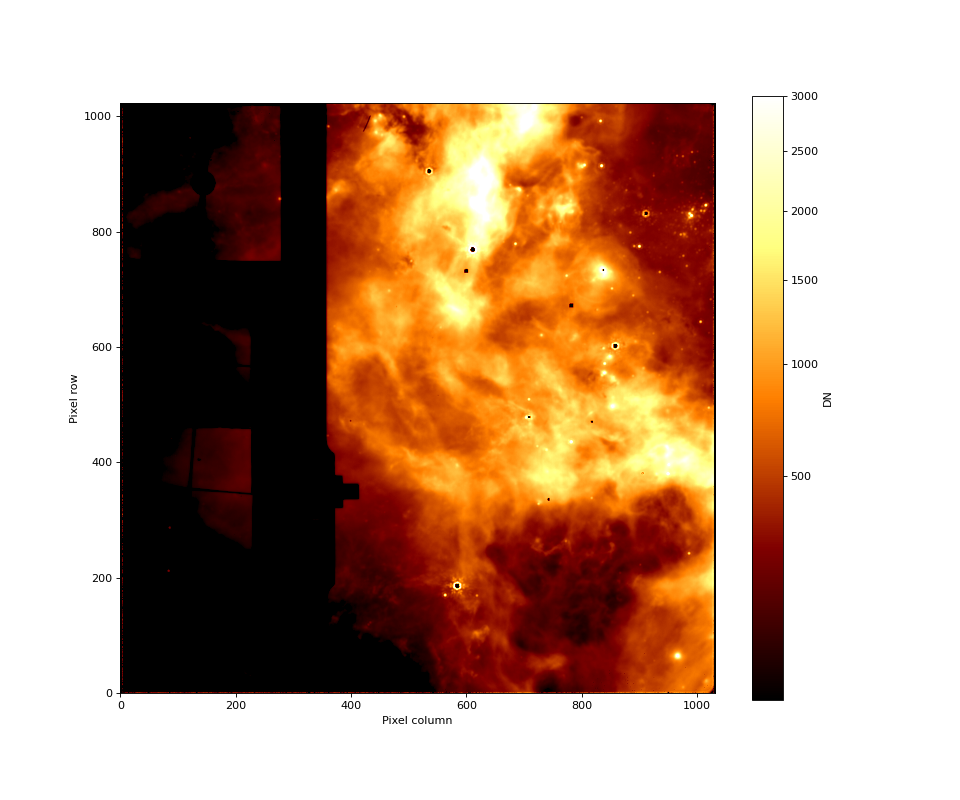

In [14]:
show_image(miri_rate.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

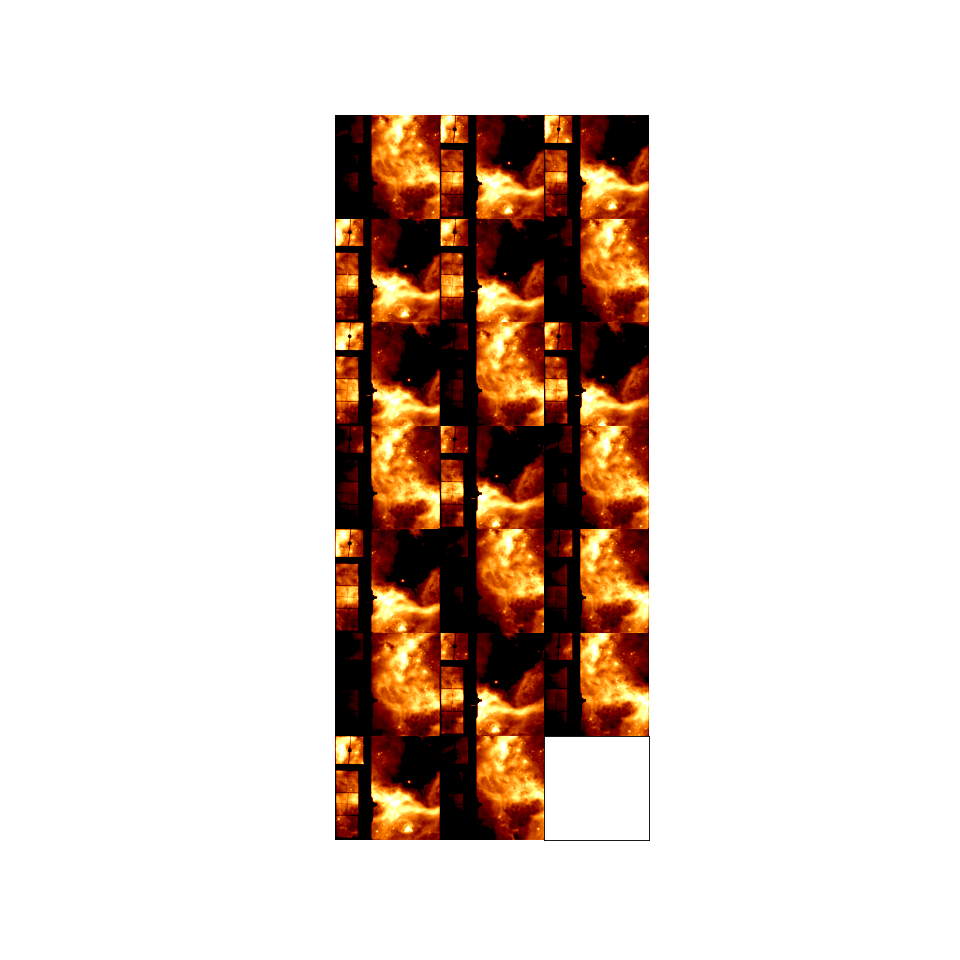

In [15]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_rate_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_rate_files):
    with datamodels.open(cfile) as miri_rate:
        cimage = miri_rate.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE2

In [16]:
miri_rate_files = glob.glob(f"./{filter}/stage1/*ge_fixed_rate.fits")
output_dir = f'./{filter}/stage2'
print(miri_rate_files)

['./F1000W/stage1/jw02729002002_02103_00008_mirimage_fixed_rate.fits', './F1000W/stage1/jw02729002001_02103_00008_mirimage_fixed_rate.fits', './F1000W/stage1/jw02729002001_02103_00003_mirimage_fixed_rate.fits', './F1000W/stage1/jw02729002001_02103_00009_mirimage_fixed_rate.fits', './F1000W/stage1/jw02729002001_02103_00001_mirimage_fixed_rate.fits', './F1000W/stage1/jw02729002002_02103_00009_mirimage_fixed_rate.fits', './F1000W/stage1/jw02729002001_02103_00005_mirimage_fixed_rate.fits', './F1000W/stage1/jw02729002002_02103_00001_mirimage_fixed_rate.fits', './F1000W/stage1/jw02729002001_02103_00006_mirimage_fixed_rate.fits', './F1000W/stage1/jw02729002002_02103_00006_mirimage_fixed_rate.fits', './F1000W/stage1/jw02729002001_02103_00007_mirimage_fixed_rate.fits', './F1000W/stage1/jw02729002002_02103_00002_mirimage_fixed_rate.fits', './F1000W/stage1/jw02729002001_02103_00002_mirimage_fixed_rate.fits', './F1000W/stage1/jw02729002002_02103_00004_mirimage_fixed_rate.fits', './F1000W/stage1/jw

In [17]:
if run_image2:
    miri_image2(miri_rate_files, output_dir, flatfile=flatfile)

2022-07-25 10:05:12,225 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2022-07-25 10:05:12,226 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_combined_background': False, 'sigma': 3.0, 'maxiters': None, 'wfss_mmag_extract': None, 'override_wfssbkg': None, 'override_wavelengthrange': None, 'class': ''}


2022-07-25 10:05:12,227 - stpipe.Image2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2022-07-25 10:05:12,228 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'sip_approx': True, 's

2022-07-25 10:05:18,108 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-25 10:05:18,108 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-25 10:05:18,108 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-25 10:05:18,108 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-25 10:05:18,110 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 10:05:18,111 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-25 10:05:18,111 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-25 10:05:18,112 - stpipe.Image2Pipeline - 

2022-07-25 10:05:18,139 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-25 10:05:18,140 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-25 10:05:18,140 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-25 10:05:18,141 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-25 10:05:18,141 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-25 10:05:18,141 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-25 10:05:18,141 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02103_00009_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupo

2022-07-25 10:05:18,202 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 10:05:18,202 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-25 10:05:18,202 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-25 10:05:18,203 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0786.fits'.
2022-07-25 10:05:18,204 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-25 10:05:18,204 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-25 10:05:18,204 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-25 10:05:18,204 - stpipe.Image2Pipeline - INFO - Prefetch for IF

2022-07-25 10:05:18,233 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-25 10:05:18,234 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-25 10:05:18,234 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw02729002001_02103_00006_mirimage_fixed_rate.fits' reftypes = ['area', 'camera', 'collimator', 'dflat', 'disperser', 'distortion', 'drizpars', 'fflat', 'filteroffset', 'flat', 'fore', 'fpa', 'ifufore', 'ifupost', 'ifuslicer', 'msa', 'ote', 'photom', 'regions', 'sflat', 'specwcs', 'wavelengthrange', 'wfssbkg']
2022-07-25 10:05:18,237 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-25 10:05:18,248 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-25 10:05:18,249 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.


2022-07-25 10:05:18,274 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0786.fits'.
2022-07-25 10:05:18,275 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-25 10:05:18,275 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/A'.
2022-07-25 10:05:18,275 - stpipe.Image2Pipeline - INFO - Prefetch for IFUFORE reference file is 'N/A'.
2022-07-25 10:05:18,276 - stpipe.Image2Pipeline - INFO - Prefetch for IFUPOST reference file is 'N/A'.
2022-07-25 10:05:18,276 - stpipe.Image2Pipeline - INFO - Prefetch for IFUSLICER reference file is 'N/A'.
2022-07-25 10:05:18,276 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-25 10:05:18,276 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-25 10:05:18,276 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/refe

2022-07-25 10:05:18,749 - stpipe.Image2Pipeline - INFO - Prefetch for AREA reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits'.
2022-07-25 10:05:18,785 - stpipe.Image2Pipeline - INFO - Prefetch for CAMERA reference file is 'N/A'.
2022-07-25 10:05:18,786 - stpipe.Image2Pipeline - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2022-07-25 10:05:18,786 - stpipe.Image2Pipeline - INFO - Prefetch for DFLAT reference file is 'N/A'.
2022-07-25 10:05:18,786 - stpipe.Image2Pipeline - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2022-07-25 10:05:18,786 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-25 10:05:18,827 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 10:05:18,870 - stpipe.Image2Pipeline - INFO - Prefetch

2022-07-25 10:05:19,485 - stpipe.Image2Pipeline - INFO - Prefetch for MSA reference file is 'N/A'.
2022-07-25 10:05:19,485 - stpipe.Image2Pipeline - INFO - Prefetch for OTE reference file is 'N/A'.
2022-07-25 10:05:19,485 - stpipe.Image2Pipeline - INFO - Prefetch for PHOTOM reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits'.
2022-07-25 10:05:19,529 - stpipe.Image2Pipeline - INFO - Prefetch for REGIONS reference file is 'N/A'.
2022-07-25 10:05:19,529 - stpipe.Image2Pipeline - INFO - Prefetch for SFLAT reference file is 'N/A'.
2022-07-25 10:05:19,529 - stpipe.Image2Pipeline - INFO - Prefetch for SPECWCS reference file is 'N/A'.
2022-07-25 10:05:19,529 - stpipe.Image2Pipeline - INFO - Prefetch for WAVELENGTHRANGE reference file is 'N/A'.
2022-07-25 10:05:19,530 - stpipe.Image2Pipeline - INFO - Prefetch for WFSSBKG reference file is 'N/A'.
2022-07-25 10:05:19,530 - stpipe.Image2Pipeline - INFO - Prefetching reference files for dataset: 'jw027290020

2022-07-25 10:05:20,083 - stpipe.Image2Pipeline - INFO - Prefetch for DISTORTION reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf'.
2022-07-25 10:05:20,128 - stpipe.Image2Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 10:05:20,168 - stpipe.Image2Pipeline - INFO - Prefetch for FFLAT reference file is 'N/A'.
2022-07-25 10:05:20,168 - stpipe.Image2Pipeline - INFO - Prefetch for FILTEROFFSET reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf'.
2022-07-25 10:05:20,205 - stpipe.Image2Pipeline - INFO - Prefetch for FLAT reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_flat_0786.fits'.
2022-07-25 10:05:20,246 - stpipe.Image2Pipeline - INFO - Prefetch for FORE reference file is 'N/A'.
2022-07-25 10:05:20,247 - stpipe.Image2Pipeline - INFO - Prefetch for FPA reference file is 'N/

2022-07-25 10:05:21,798 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 10:05:21,798 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 10:05:21,799 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 10:05:21,805 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 10:05:21,950 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-25 10:05:22,122 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02729002002_02103_00008_mirimage_fixed_rate.fits>,).
2022-07-25 10:05:22,124 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-07-25 10:05:28,421 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02729002001_02103_00008_mirimage_fixed_rate.fits>,).
2022-07-25 10:05:28,423 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-25 10:05:28,532 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-25 10:05:28,532 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 10:05:28,690 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-25 10:05:28

2022-07-25 10:05:34,742 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 10:05:34,824 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-25 10:05:34,825 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-25 10:05:34,825 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-25 10:05:34,825 - stpipe.Image2Pipeline.photom - INFO -  filter: F1000W
2022-07-25 10:05:35,017 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-25 10:05:35,019 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-25 10:05:35,020 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 10:05:35,020 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.369118
2022-07-25 10:05:35,037 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 10:05:35,221 - stpipe.Im

2022-07-25 10:05:41,135 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 10:05:41,136 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.369118
2022-07-25 10:05:41,152 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 10:05:41,333 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02729002001_02103_00009_mirimage_fixed_rate.fits>,).
2022-07-25 10:05:41,334 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixe

2022-07-25 10:05:47,440 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-25 10:05:47,587 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-25 10:05:48,077 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 10:05:48,408 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-25 10:05:48,880 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 10:05:49,215 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-25 10:05:49,688 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 10:05:50,020 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 10:05:50,492 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 10:05:50,841 - stpipe.Image2Pipeline.resample 

2022-07-25 10:05:56,673 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 10:05:57,141 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 10:05:57,489 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  84.590416261 -69.075642497 84.590538893 -69.107038043 84.679438207 -69.106970841 84.679188159 -69.075575391
2022-07-25 10:05:58,070 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1000W/stage2/jw02729002002_02103_00009_mirimage_fixed_i2d.fits
2022-07-25 10:05:58,070 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-25 10:05:58,071 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1000W/stage1/jw02729002002_02103_00009_mirimage_fixed
2022-07-25 10:05:58,072 - stpipe.Image2Pipeline - INFO - Processing product ./F1000W/stage1/jw02729002001_02103_00005_mirimage_fixed
2022-07-25 10:05:58,072 - stpipe.Image2Pipeline - INFO - Working on input ./F1000W/stage1/jw02

2022-07-25 10:06:04,234 - stpipe.Image2Pipeline - INFO - Processing product ./F1000W/stage1/jw02729002002_02103_00001_mirimage_fixed
2022-07-25 10:06:04,235 - stpipe.Image2Pipeline - INFO - Working on input ./F1000W/stage1/jw02729002002_02103_00001_mirimage_fixed_rate.fits ...
2022-07-25 10:06:04,487 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02729002002_02103_00001_mirimage_fixed_rate.fits>,).
2022-07-25 10:06:04,488 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high'

2022-07-25 10:06:10,322 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-25 10:06:10,424 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  84.652347589 -69.077570319 84.653055216 -69.108849566 84.741152906 -69.108615471 84.741129714 -69.077283195
2022-07-25 10:06:10,425 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  84.652347589 -69.077570319 84.653055216 -69.108849566 84.741152906 -69.108615471 84.741129714 -69.077283195
2022-07-25 10:06:10,425 - stpipe.Image2

2022-07-25 10:06:16,157 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  84.600198628 -69.077759698 84.600629082 -69.109039588 84.688729376 -69.108904904 84.688983823 -69.077572757
2022-07-25 10:06:16,157 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-25 10:06:16,223 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-25 10:06:16,428 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02729002002_02103_00006_mirimage_fixed_rate.fits>,).
2022-07-25 10:06:16,429 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat':

2022-07-25 10:06:22,183 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_PARTIAL_DATA does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 10:06:22,183 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_LOW_QUAL does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 10:06:22,184 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword CDP_UNRELIABLE_ERROR does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 10:06:22,189 - stpipe.Image2Pipeline.flat_field - WARNING - Keyword DIFF_PATTERN does not correspond to an existing DQ mnemonic, so will be ignored
2022-07-25 10:06:22,308 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field done
2022-07-25 10:06:22,509 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02729002001_02103_00007_mirimage_fixed_rate.fits>,).
2022-07-25 10:06:22,511 - stpipe.Image2Pipeline.photom - INFO - Step photom paramete

2022-07-25 10:06:28,255 - stpipe.Image2Pipeline.photom - INFO - Step photom running with args (<ImageModel(1024, 1032) from jw02729002002_02103_00002_mirimage_fixed_rate.fits>,).
2022-07-25 10:06:28,256 - stpipe.Image2Pipeline.photom - INFO - Step photom parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'photom', 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}
2022-07-25 10:06:28,279 - stpipe.Image2Pipeline.photom - INFO - Using photom reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_photom_0074.fits
2022-07-25 10:06:28,279 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 10:06:28,366 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-25 10:06:28

2022-07-25 10:06:34,351 - stpipe.Image2Pipeline.photom - INFO - Using area reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_area_0004.fits
2022-07-25 10:06:34,430 - stpipe.Image2Pipeline.photom - INFO - Using instrument: MIRI
2022-07-25 10:06:34,430 - stpipe.Image2Pipeline.photom - INFO -  detector: MIRIMAGE
2022-07-25 10:06:34,431 - stpipe.Image2Pipeline.photom - INFO -  exp_type: MIR_IMAGE
2022-07-25 10:06:34,431 - stpipe.Image2Pipeline.photom - INFO -  filter: F1000W
2022-07-25 10:06:34,472 - stpipe.Image2Pipeline.photom - INFO - Pixel area map copied to output.
2022-07-25 10:06:34,474 - stpipe.Image2Pipeline.photom - INFO -  subarray: FULL
2022-07-25 10:06:34,474 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 10:06:34,475 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.369118
2022-07-25 10:06:34,491 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 10:06:34,699 - stpipe.Im

2022-07-25 10:06:40,421 - stpipe.Image2Pipeline.photom - WARNING - Expected to find one matching row in table, found 0.
2022-07-25 10:06:40,421 - stpipe.Image2Pipeline.photom - INFO - PHOTMJSR value: 0.369118
2022-07-25 10:06:40,438 - stpipe.Image2Pipeline.photom - INFO - Step photom done
2022-07-25 10:06:40,649 - stpipe.Image2Pipeline.resample - INFO - Step resample running with args (<ImageModel(1024, 1032) from jw02729002002_02103_00004_mirimage_fixed_rate.fits>,).
2022-07-25 10:06:40,650 - stpipe.Image2Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'output_shape': None, 'crpix': None, 'crval': None, 'rotation': None, 'pixel_scale_ratio': 1.0, 'pixe

2022-07-25 10:06:46,511 - stpipe.Image2Pipeline.resample - INFO - Drizpars reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits
2022-07-25 10:06:46,702 - stpipe.Image2Pipeline.resample - INFO - Resampling science data
2022-07-25 10:06:47,220 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 10:06:47,550 - stpipe.Image2Pipeline.resample - INFO - Resampling var_rnoise
2022-07-25 10:06:48,078 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 10:06:48,413 - stpipe.Image2Pipeline.resample - INFO - Resampling var_poisson
2022-07-25 10:06:48,940 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 10:06:49,277 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 10:06:49,805 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 10:06:50,159 - stpipe.Image2Pipeline.resample 

2022-07-25 10:06:55,152 - stpipe.Image2Pipeline.resample - INFO - Resampling var_flat
2022-07-25 10:06:55,662 - stpipe.Image2Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1019, 1029)
2022-07-25 10:06:56,016 - stpipe.Image2Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  84.587477365 -69.078552385 84.587596302 -69.109947933 84.676507457 -69.109882066 84.676261066 -69.078486612
2022-07-25 10:06:56,593 - stpipe.Image2Pipeline.resample - INFO - Saved model in ./F1000W/stage2/jw02729002002_02103_00005_mirimage_fixed_i2d.fits
2022-07-25 10:06:56,593 - stpipe.Image2Pipeline.resample - INFO - Step resample done
2022-07-25 10:06:56,594 - stpipe.Image2Pipeline - INFO - Finished processing product ./F1000W/stage1/jw02729002002_02103_00005_mirimage_fixed
2022-07-25 10:06:56,595 - stpipe.Image2Pipeline - INFO - Processing product ./F1000W/stage1/jw02729002001_02103_00010_mirimage_fixed
2022-07-25 10:06:56,595 - stpipe.Image2Pipeline - INFO - Working on input ./F1000W/stage1/jw02

2022-07-25 10:07:02,445 - stpipe.Image2Pipeline - INFO - Processing product ./F1000W/stage1/jw02729002002_02103_00010_mirimage_fixed
2022-07-25 10:07:02,445 - stpipe.Image2Pipeline - INFO - Working on input ./F1000W/stage1/jw02729002002_02103_00010_mirimage_fixed_rate.fits ...
2022-07-25 10:07:02,715 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(1024, 1032) from jw02729002002_02103_00010_mirimage_fixed_rate.fits>,).
2022-07-25 10:07:02,717 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_wcs', 'search_output_file': True, 'input_dir': '', 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high'

2022-07-25 10:07:08,825 - stpipe.Image2Pipeline.assign_wcs - INFO - Created a MIRI mir_image pipeline with references {'distortion': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_distortion_0047.asdf', 'filteroffset': '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_filteroffset_0006.asdf', 'specwcs': None, 'regions': None, 'wavelengthrange': None, 'camera': None, 'collimator': None, 'disperser': None, 'fore': None, 'fpa': None, 'msa': None, 'ote': None, 'ifupost': None, 'ifufore': None, 'ifuslicer': None}
2022-07-25 10:07:08,920 - stpipe.Image2Pipeline.assign_wcs - INFO - Update S_REGION to POLYGON ICRS  84.639541969 -69.074786850 84.640230720 -69.106066151 84.728317352 -69.105838798 84.728312998 -69.074506521
2022-07-25 10:07:08,920 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  84.639541969 -69.074786850 84.640230720 -69.106066151 84.728317352 -69.105838798 84.728312998 -69.074506521
2022-07-25 10:07:08,920 - stpipe.Image2

2022-07-25 10:07:14,902 - stpipe.Image2Pipeline.assign_wcs - INFO - assign_wcs updated S_REGION to POLYGON ICRS  84.591583335 -69.074333527 84.592001200 -69.105613439 84.680087757 -69.105483250 84.680354729 -69.074151117
2022-07-25 10:07:14,902 - stpipe.Image2Pipeline.assign_wcs - INFO - COMPLETED assign_wcs
2022-07-25 10:07:14,969 - stpipe.Image2Pipeline.assign_wcs - INFO - Step assign_wcs done
2022-07-25 10:07:15,195 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field running with args (<ImageModel(1024, 1032) from jw02729002002_02103_00003_mirimage_fixed_rate.fits>,).
2022-07-25 10:07:15,196 - stpipe.Image2Pipeline.flat_field - INFO - Step flat_field parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'flat_field', 'search_output_file': True, 'input_dir': '', 'save_interpolated_flat': False, 'user_supplied_flat':

2022-07-25 10:07:22,748 - stpipe.Image2Pipeline - INFO - Saved model in ./F1000W/stage2/jw02729002001_02103_00009_mirimage_fixed_cal.fits
2022-07-25 10:07:23,341 - stpipe.Image2Pipeline - INFO - Saved model in ./F1000W/stage2/jw02729002001_02103_00001_mirimage_fixed_cal.fits
2022-07-25 10:07:23,971 - stpipe.Image2Pipeline - INFO - Saved model in ./F1000W/stage2/jw02729002002_02103_00009_mirimage_fixed_cal.fits
2022-07-25 10:07:24,564 - stpipe.Image2Pipeline - INFO - Saved model in ./F1000W/stage2/jw02729002001_02103_00005_mirimage_fixed_cal.fits
2022-07-25 10:07:25,186 - stpipe.Image2Pipeline - INFO - Saved model in ./F1000W/stage2/jw02729002002_02103_00001_mirimage_fixed_cal.fits
2022-07-25 10:07:25,794 - stpipe.Image2Pipeline - INFO - Saved model in ./F1000W/stage2/jw02729002001_02103_00006_mirimage_fixed_cal.fits
2022-07-25 10:07:26,369 - stpipe.Image2Pipeline - INFO - Saved model in ./F1000W/stage2/jw02729002002_02103_00006_mirimage_fixed_cal.fits
2022-07-25 10:07:26,948 - stpipe.I

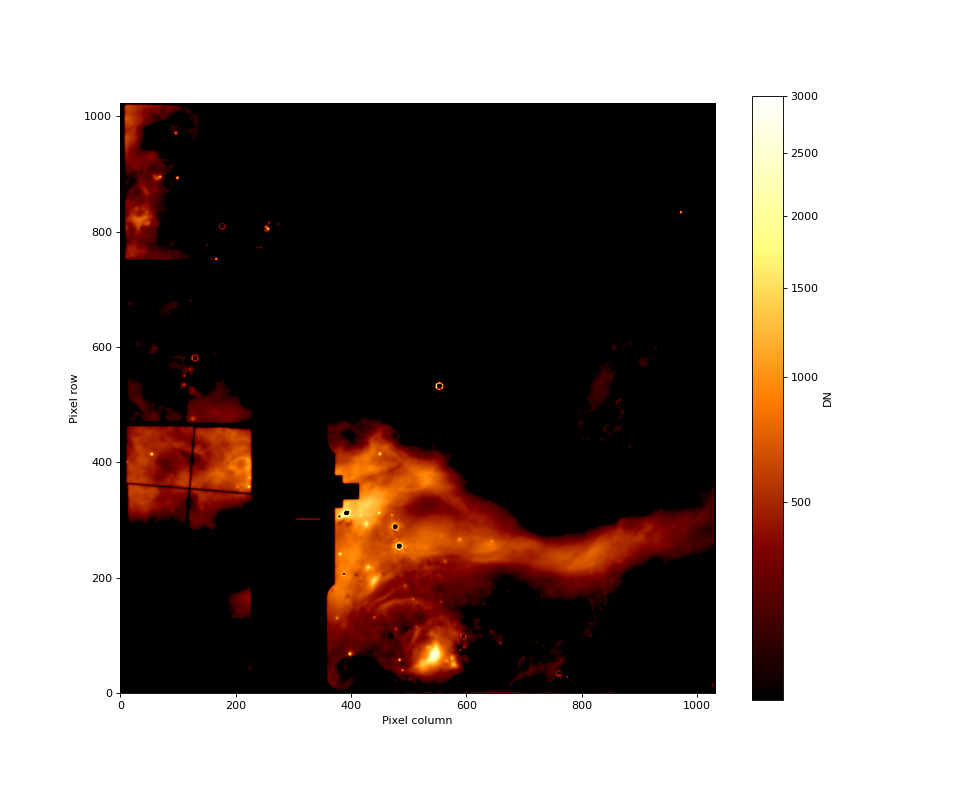

In [18]:
drange = drange_cal
# look at one of the images
miri_cal_files = glob.glob(f"./{filter}/stage2/*ge_fixed_cal.fits")
miri_cal = datamodels.open(miri_cal_files[0])
show_image(miri_cal.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

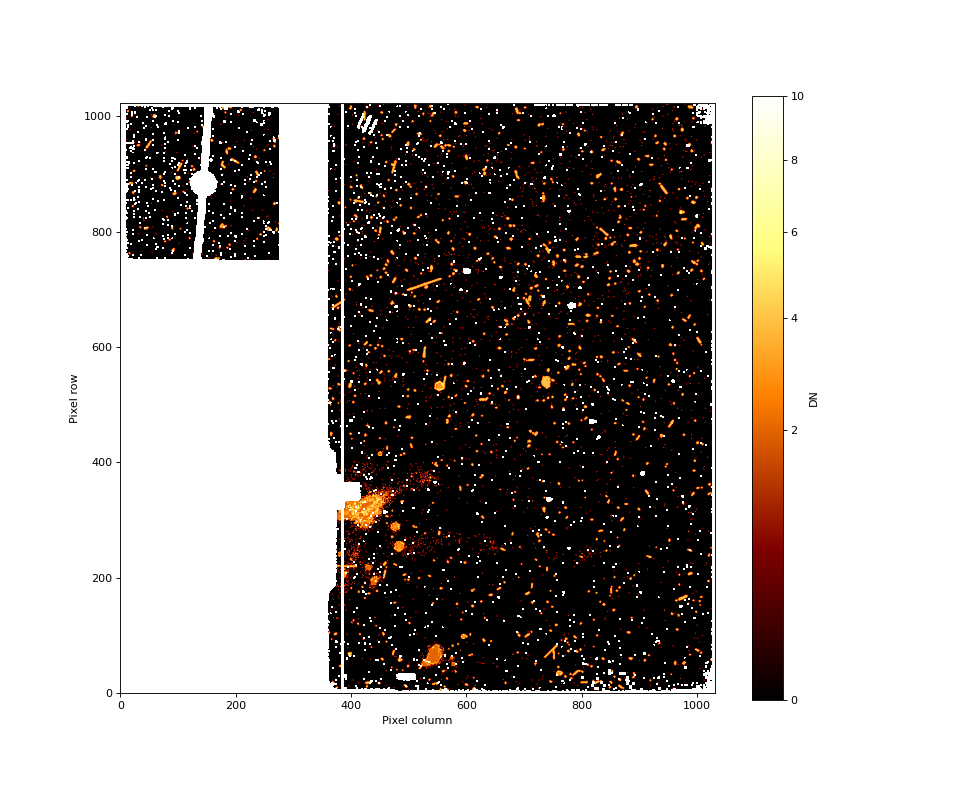

In [19]:
show_image(miri_cal.dq, 0, 10, dmap=dmap)

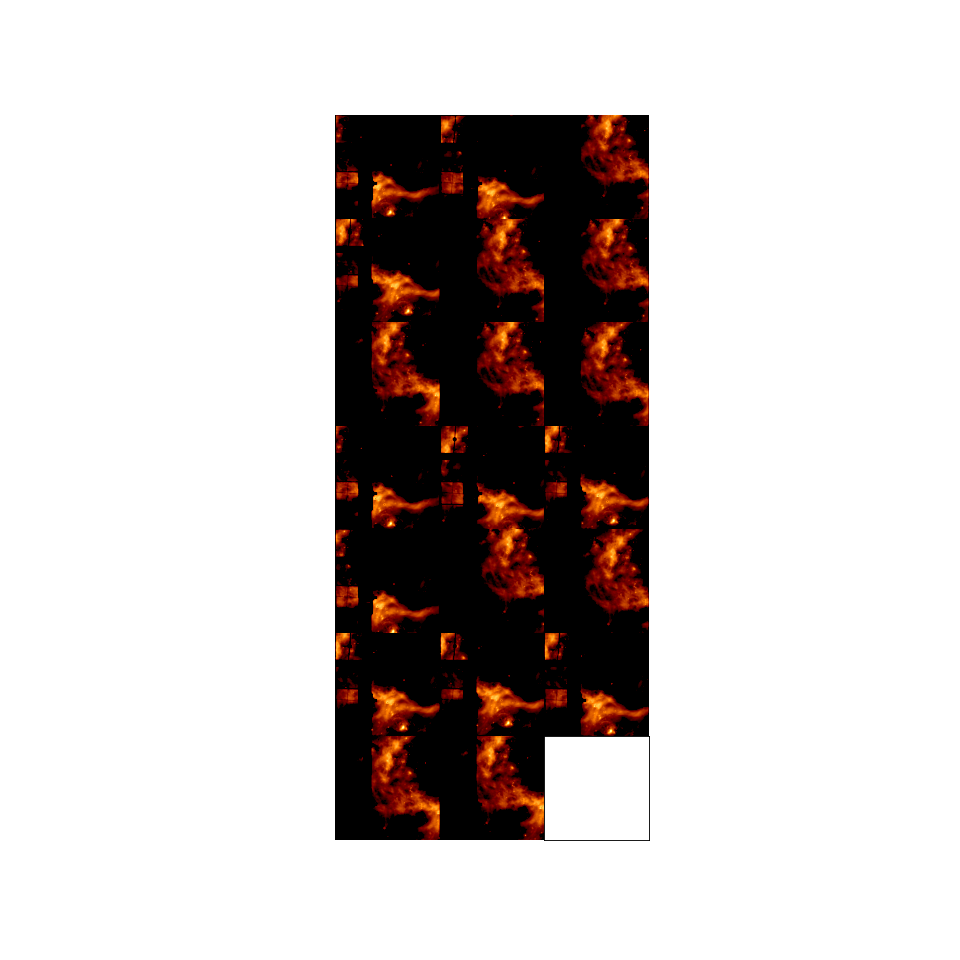

In [20]:
# display the images
fig = plt.figure(1, figsize=(12, 12))
ncols = len(miri_cal_files) // 3
grid = ImageGrid(fig, 111, nrows_ncols=(ncols+1, 3), axes_pad=0)

for i, cfile in enumerate(miri_cal_files):
    with datamodels.open(cfile) as miri_cal:
        cimage = miri_cal.data
        norm_data = simple_norm(cimage, "sqrt", min_cut=drange[0], max_cut=drange[1])
        grid[i].imshow(cimage, norm=norm_data, origin="lower", cmap=plt.get_cmap(dmap))
        grid[i].axis('off')
        grid[i].set_xticks([])
        grid[i].set_yticks([])

## CALWEBB_IMAGE3

In [21]:
# update the WCS for mosaic tile 1
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}1*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile1_shifts)

# update the WCS for mosaic tile 2
miri_cal_files = glob.glob(f"./{filter}/stage2/{basename}2*ge_fixed_cal.fits")
for cfile in miri_cal_files:
    shift_cal_wcs(cfile, tile2_shifts)

In [22]:
miri_cal_files = glob.glob(f"./{filter}/stage2/j*ge_fixed_wcs_cal.fits")
output_dir = f"./{filter}/stage3/"
print(miri_cal_files)

if rotation is not None:
    miri_asn_name = f'miri_{filter}_stage3_fixedrot_asn'
else: 
    miri_asn_name = f'miri_{filter}_stage3_asn'
miri_asn = asn_from_list.asn_from_list(miri_cal_files, rule=DMS_Level3_Base, product_name=miri_asn_name)

miri_asn_file = f'{miri_asn_name}.json'
with open(miri_asn_file, 'w') as outfile:
    name, serialized = miri_asn.dump(format='json')
    outfile.write(serialized)
    
print(miri_asn_file)

['./F1000W/stage2/jw02729002001_02103_00009_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02729002002_02103_00002_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02729002002_02103_00006_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02729002002_02103_00001_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02729002002_02103_00009_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02729002002_02103_00010_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02729002001_02103_00010_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02729002002_02103_00008_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02729002001_02103_00007_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02729002001_02103_00006_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02729002002_02103_00005_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02729002001_02103_00008_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02729002001_02103_00004_mirimage_fixed_wcs_cal.fits', './F1000W/stage2/jw02729002002_02103_00007_mirimag

In [23]:
if run_image3:
    miri_image3(miri_asn_file, output_dir, fwhm=fwhm, matchbkg=matchbkg, 
                crval=crval, rotation=rotation, 
                tweakreg=tweakreg, align_to_gaia=align_to_gaia)

2022-07-25 10:08:04,609 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2022-07-25 10:08:04,610 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': 'assign_mtwcs', 'search_output_file': True, 'input_dir': None, 'class': ''}


2022-07-25 10:08:04,611 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2022-07-25 10:08:04,613 - stpipe - CRITICAL - config: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.5, 'snr_threshold': 10.0, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_re

2022-07-25 10:08:05,126 - stpipe.Image3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/home/kgordon/crds_cache/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2022-07-25 10:08:05,127 - stpipe.Image3Pipeline - INFO - Starting calwebb_image3 ...
2022-07-25 10:08:09,774 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg running with args (<ModelContainer>,).
2022-07-25 10:08:09,775 - stpipe.Image3Pipeline.tweakreg - INFO - Step tweakreg parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': True, 'output_use_index': True, 'save_results': True, 'skip': True, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'save_catalogs': False, 'catalog_format': 'ecsv', 'kernel_fwhm': 2.9, 'snr_threshold': 5, 'brightest': 200, 'peakmax': None, 'enforce_user_order': False, 'expand_refcat': False, 'minobj': 5, 'searchrad': 5.0, 'use2dhist': True, 'separation': 1.0, 'tolerance': 0.7, 'xoffset': 

2022-07-25 10:08:53,344 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 39274 (3.72%)
2022-07-25 10:08:53,421 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 21907 (2.07%)
2022-07-25 10:08:53,496 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 5606 (0.53%)
2022-07-25 10:08:53,573 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 52638 (4.98%)
2022-07-25 10:08:53,649 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 14531 (1.38%)
2022-07-25 10:08:53,725 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 6098 (0.58%)
2022-07-25 10:08:53,801 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 14537 (1.38%)
2022-07-25 10:08:53,877 - stpipe.Image3Pipeline.outlier_detection - INFO - New pixels flagged as outliers: 22855 (2.16%)
2022-07-25 10:08:53,953 - stpipe.I

2022-07-25 10:09:30,172 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1172, 1818)
2022-07-25 10:09:31,122 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1172, 1818)
2022-07-25 10:09:32,080 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1172, 1818)
2022-07-25 10:09:33,040 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1172, 1818)
2022-07-25 10:09:33,996 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1172, 1818)
2022-07-25 10:09:34,955 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1172, 1818)
2022-07-25 10:09:35,288 - stpipe.Image3Pipeline.resample - INFO - Resampling var_rnoise
2022-07-25 10:09:35,922 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1172, 1818)
2022-07-25 10:09:36,898 - stpipe.Image3Pipeline.resample - INFO - Drizzling (1024, 1032) --> (1172, 1818)
2022-07-25 10:09:37,866 - stpipe.Image3Pipeline.resample - INFO 

2022-07-25 10:10:34,926 - stpipe.Image3Pipeline.source_catalog - INFO - Using APCORR reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_apcorr_0008.fits
2022-07-25 10:10:34,935 - stpipe.Image3Pipeline.source_catalog - INFO - Using ABVEGAOFFSET reference file: /home/kgordon/crds_cache/references/jwst/miri/jwst_miri_abvegaoffset_0001.asdf
2022-07-25 10:10:34,936 - stpipe.Image3Pipeline.source_catalog - INFO - Instrument: MIRI
2022-07-25 10:10:34,936 - stpipe.Image3Pipeline.source_catalog - INFO - Detector: MIRIMAGE
2022-07-25 10:10:34,936 - stpipe.Image3Pipeline.source_catalog - INFO - Filter: F1000W
2022-07-25 10:10:34,937 - stpipe.Image3Pipeline.source_catalog - INFO - Subarray: FULL
2022-07-25 10:10:35,012 - stpipe.Image3Pipeline.source_catalog - INFO - AB to Vega magnitude offset 4.95551
2022-07-25 10:10:35,096 - stpipe.Image3Pipeline.source_catalog - INFO - Background could not be estimated in meshes. Using the entire unmasked array for background estimation: bk

In [24]:
# Look at the resulting mosaic image
miri_mosaic_file = output_dir + miri_asn_name + '_i2d.fits'
miri_catalog_file = output_dir + miri_asn_name + '_cat.ecsv'

In [25]:
# Open the mosaic image
miri_mosaic = datamodels.open(miri_mosaic_file)

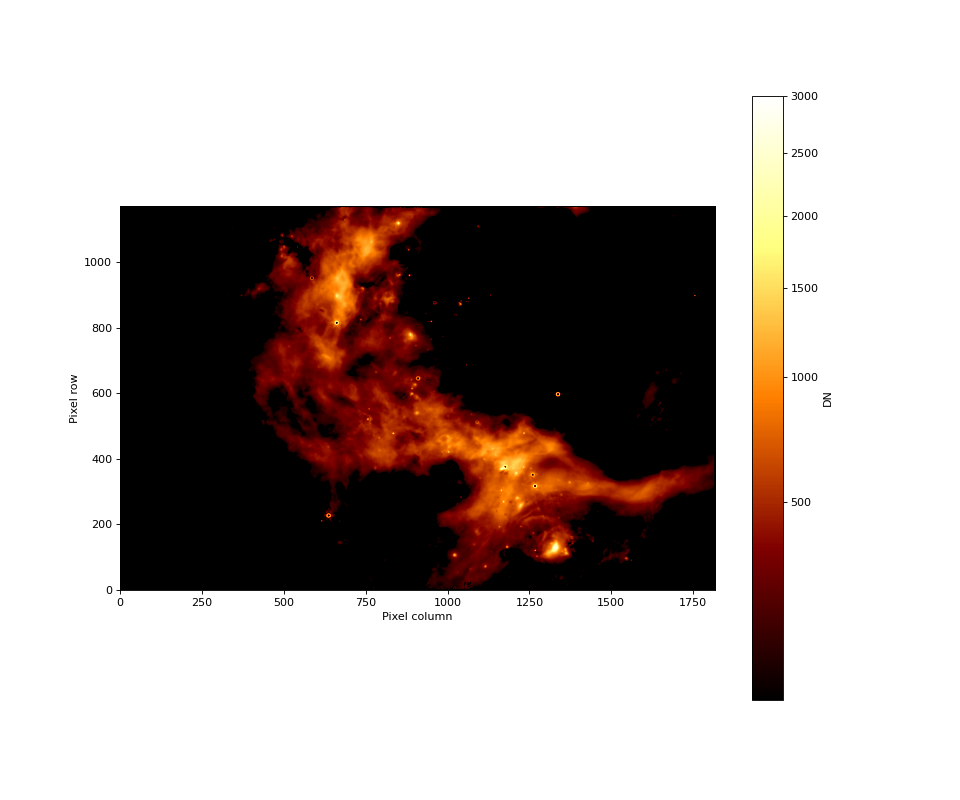

In [26]:
# Look at the mosaic
show_image(miri_mosaic.data, vmin=drange[0], vmax=drange[1], dmap=dmap)

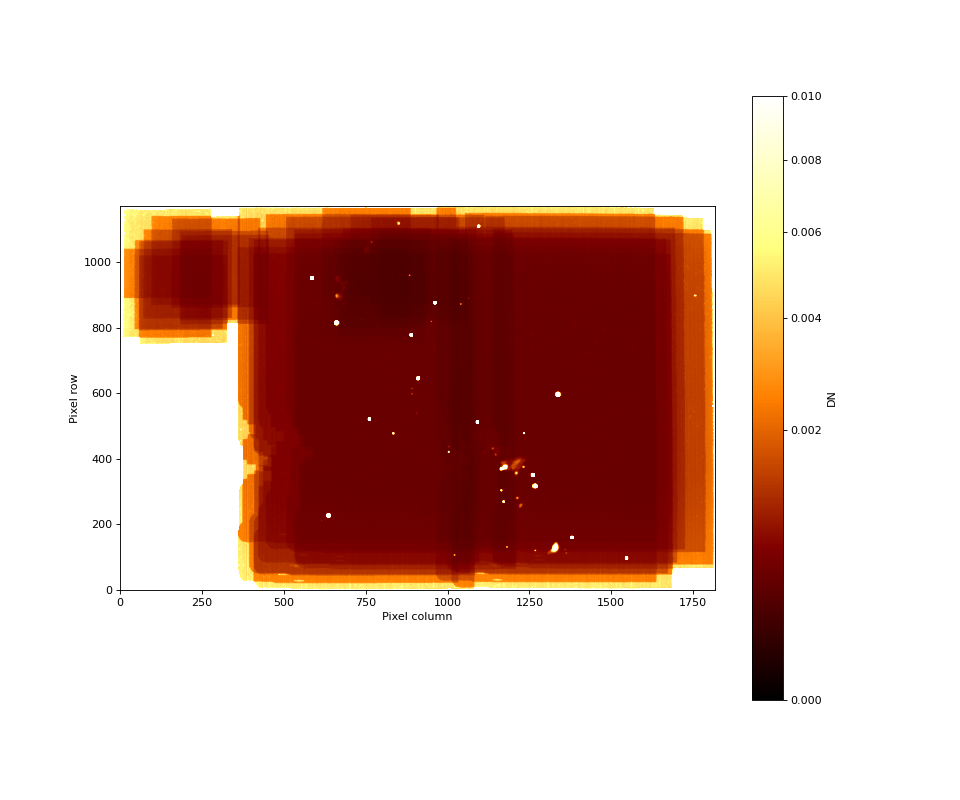

In [27]:
# Look at the mosaic data read noise uncertainties (i.e., coverage map)
show_image(miri_mosaic.var_rnoise, vmin=0.0, vmax=0.01, dmap=dmap)

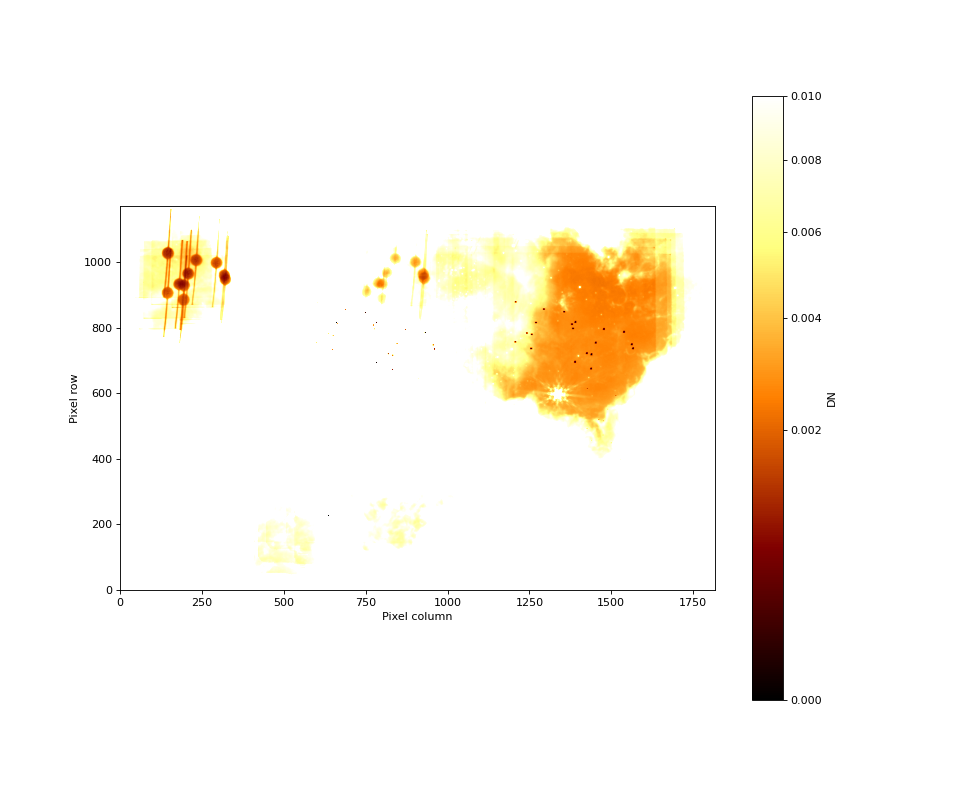

In [28]:
# Look at the mosaic data poisson uncertainties
show_image(miri_mosaic.var_poisson, vmin=0, vmax=0.01, dmap=dmap)

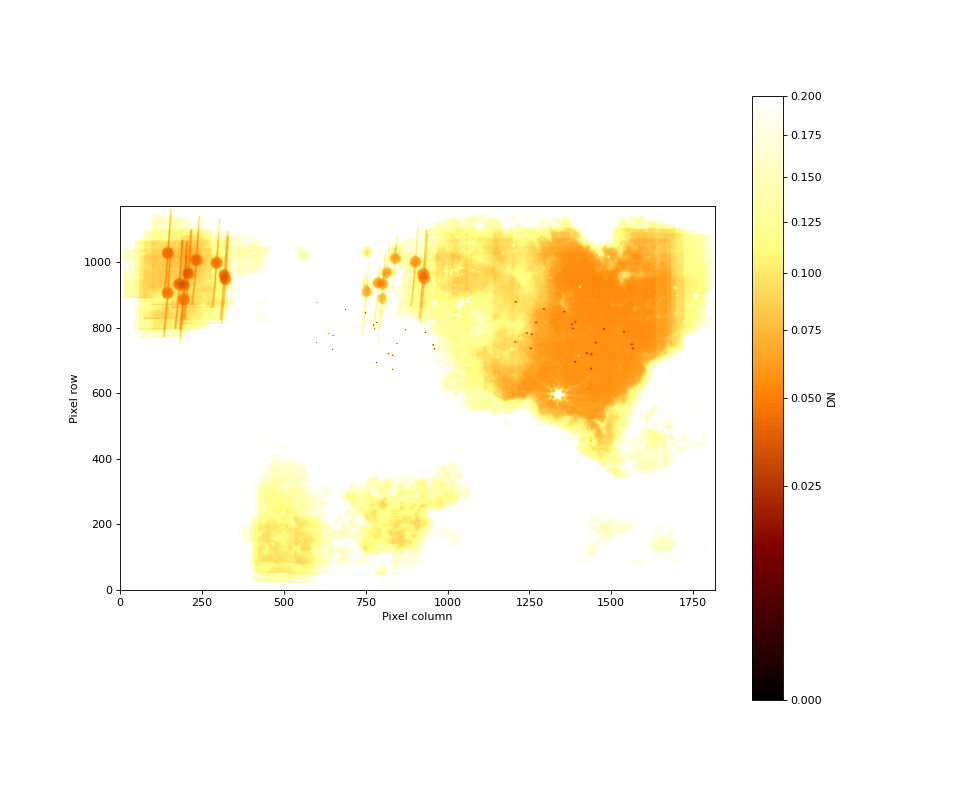

In [29]:
# Look at the mosaic total data uncertainties
show_image(miri_mosaic.err, vmin=0, vmax=0.2, dmap=dmap)

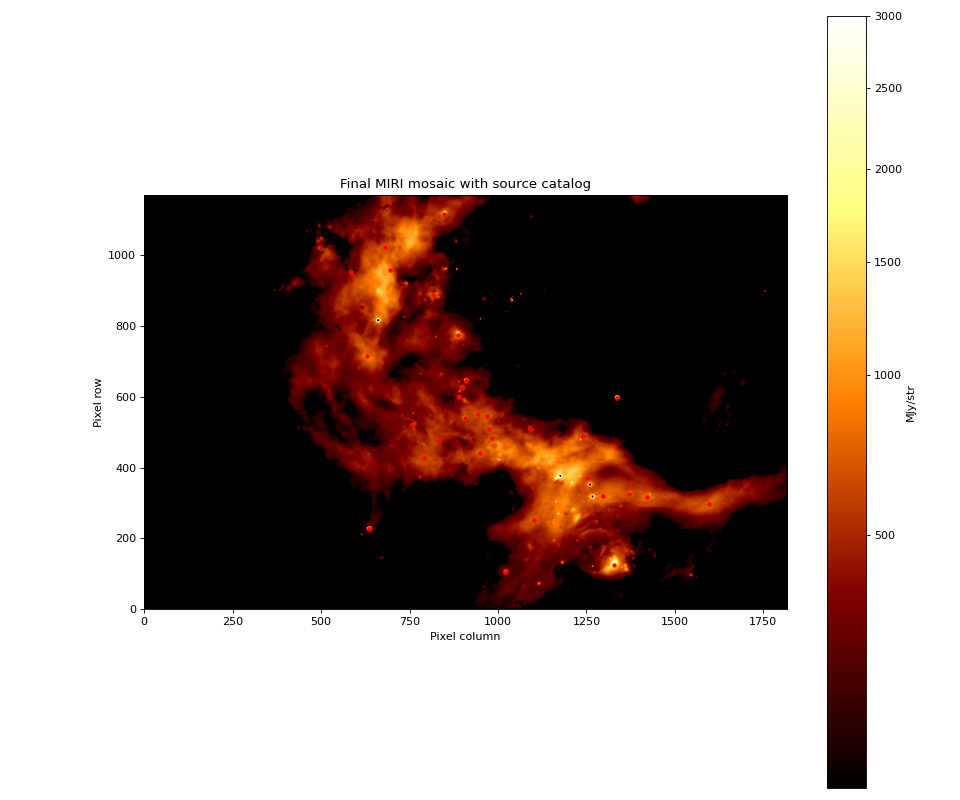

In [30]:
if os.path.isfile(miri_catalog_file):
    # Read in the source catalog
    miri_source_cat = ascii.read(miri_catalog_file)
    # Show the catalog sources on the mosaic
    overlay_catalog(miri_mosaic.data, miri_source_cat, flux_limit=5e-7, vmin=drange[0], vmax=drange[1],
                    title='Final MIRI mosaic with source catalog', dmap=dmap)